Text(0.5, 1.0, 't-SNE of Data into 2 Dimensions')

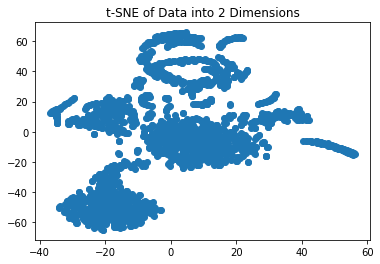

In [1]:
import pandas as pd

df = pd.read_excel(r"./../Data/RawData.xlsx")

import pandas as pd
from sklearn.preprocessing import StandardScaler

def tSNE(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    #t-SNE code

    from sklearn.manifold import TSNE

    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(df_scaled)
    return tsne_result

tsne_result = tSNE(df)

import matplotlib.pyplot as plt

plt.scatter(tsne_result[:,0], tsne_result[:,1])
plt.title("t-SNE of Data into 2 Dimensions")




In [2]:
#placeholder

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
 

dbscan_model = DBSCAN(eps= 7.6).fit(tsne_result)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_

df['cluster'].value_counts()


0    1926
1      69
Name: cluster, dtype: int64

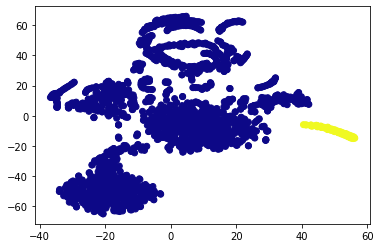

In [4]:
plt.scatter(tsne_result[:, 0], tsne_result[:,1], c = dbscan_model.labels_, cmap= "plasma")

/Users/Nguyener/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/Nguyener/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


 0    1912
 2      33
 3      15
 4      11
-1      10
 1       8
 5       6
Name: cluster, dtype: int64

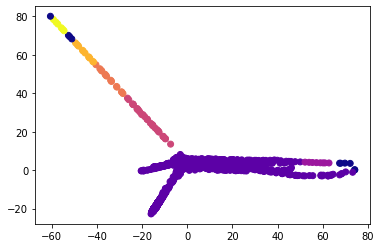

In [6]:
from sklearn.manifold import Isomap

def IsomapDR(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    n_components=2

    isomap = Isomap(n_components=2)
    isomap_result = isomap.fit_transform(df_scaled)
    return isomap_result

isomap_result = IsomapDR(df)

dbscan_model = DBSCAN(eps= 3.76).fit(isomap_result)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_


plt.scatter(isomap_result[:, 0], isomap_result[:,1], c = dbscan_model.labels_, cmap= "plasma")

df['cluster'].value_counts()


Text(0.5, 1.0, 'DR of the training set by PCA')

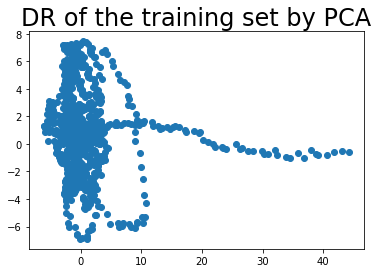

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

mydata = pd.read_excel(r"./../Data/RawData.xlsx")

myscaled = StandardScaler().fit(mydata)

mydata_scaled = myscaled.transform(mydata)

mdscaled_array = np.array(mydata_scaled)

mypca = PCA(n_components=2)
pca_result = mypca.fit_transform(mdscaled_array)

#plt.scatter(pca_result[:, 0], pca_result[:, 1])

#plt.title('DR of the training set by PCA', fontsize=24)

 0    1882
-1      95
 2      11
 1       7
Name: cluster, dtype: int64

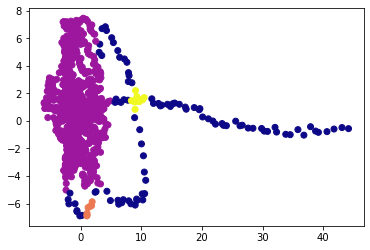

In [ ]:
dbscan_model = DBSCAN(eps= .75).fit(pca_result)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_


plt.scatter(pca_result[:, 0], pca_result[:,1], c = dbscan_model.labels_, cmap= "plasma")

df['cluster'].value_counts()

Text(0.5, 1.0, 'SVD of Data into 2 Dimensions')

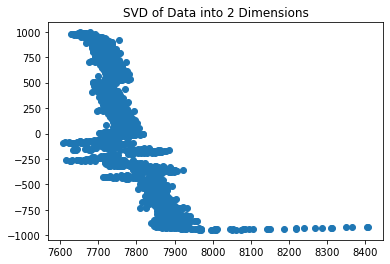

In [ ]:
from sklearn.decomposition import TruncatedSVD as SVD

SVD = SVD(n_components=2)
SVD_results = SVD.fit(df)
SVD_results = SVD.transform(df)
SVD_results.shape 

import matplotlib.pyplot as plt

#plt.scatter(SVD_results[:,0], SVD_results[:,1])
#plt.title("SVD of Data into 2 Dimensions")


 0    1200
 1     758
-1      21
 3       9
 2       7
Name: cluster, dtype: int64

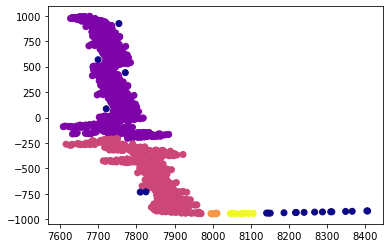

In [ ]:
dbscan_model = DBSCAN(eps= 25).fit(SVD_results)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_


plt.scatter(SVD_results[:, 0], SVD_results[:,1], c = dbscan_model.labels_, cmap= "plasma")

df['cluster'].value_counts()

In [9]:
!pip install umap-learn
import umap


myscaled = StandardScaler().fit(df)

mydata_scaled = myscaled.transform(df)

mdscaled_array = np.array(df)

myUMAP = umap.UMAP(n_neighbors=5, random_state=42).fit(mdscaled_array)
myUMAP.shape.embedding_


/Users/Nguyener/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


AttributeError: 'UMAP' object has no attribute 'shape'

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

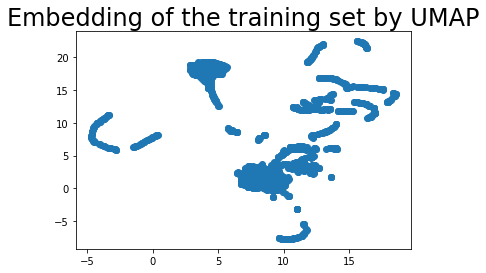

In [ ]:
plt.scatter(myUMAP.embedding_[:, 0], myUMAP.embedding_[:, 1])

plt.title('Embedding of the training set by UMAP', fontsize=24)


In [ ]:
dbscan_model = DBSCAN(eps= 25).fit(myUMAP)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_


plt.scatter(myUMAP[:, 0], myUMAP[:,1], c = dbscan_model.labels_, cmap= "plasma")

df['cluster'].value_counts()

ValueError: Expected 2D array, got scalar array instead:
array=UMAP(n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.